In [470]:
# Import required libraries

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [471]:
# Load and Explore the dataset

file_path = r"C:\Users\MSI\Desktop\ML Internship\Data Set For Task\Churn Prdiction Data\churn-bigml-80.csv"
file_path_testing = r"C:\Users\MSI\Desktop\ML Internship\Data Set For Task\Churn Prdiction Data\churn-bigml-20.csv"
df = pd.read_csv(file_path)
df_testing = pd.read_csv(file_path_testing)

In [472]:
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head(5))
print("\nMissing values per column:\n", df_training.isnull().sum())

Shape of dataset: (2666, 20)

First 5 rows:
   State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               9

In [473]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Churn
False    2278
True      388
Name: count, dtype: int64


C:\Users\MSI\AppData\Local\Temp\ipykernel_13036\2157774479.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


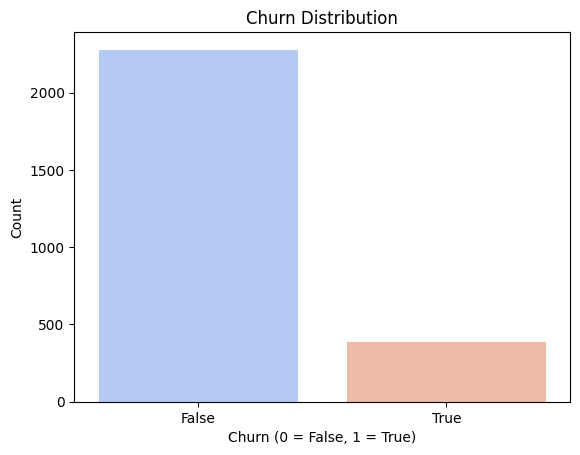

In [474]:
# Analyzing Churn Distribution
#We check the number of churners and non-churners to understand the balance of the dataset.
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = False, 1 = True)')
plt.ylabel('Count')
plt.show()

In [475]:
# Data Preprocessing 
# We need to get the data ready for our model.
#This involves dropping columns that aren't useful for prediction and converting text-based features into numbers.

# Target variable (Churn)
target = 'Churn'
y = df[target]

# Convert categorical target into binary (Yes=1, No=0)

y = y.astype(int)

# Drop ID/customer-specific columns if present
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

# Drop target column from features
df = df.drop(['State', 'Area code'], axis=1)
X = df.drop(target, errors='ignore')  

# Handle categorical variables
cat_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print("Categorical variables:",len(cat_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))



Categorical variables: 2
Integer variables: 7
Float variables: 8


In [476]:
print(df["Churn"].isna().sum())
print(df["Churn"].unique())

0
[False  True]


In [477]:
df = df.dropna()

In [478]:
# Convert text columns to numbers

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_cols = ['International plan','Voice mail plan','Churn']
for col in categorical_cols:
    df[col] = labelencoder.fit_transform(df[col])
print("Categorical features converted to numerical.")    

Categorical features converted to numerical.


In [479]:
# Impute missing values in X
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(X)

In [480]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features scaled successfully.")

Features scaled successfully.


In [481]:
# Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Data split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")

Data split into training (2132 samples) and testing (534 samples) sets.


In [482]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: Churn, Length: 2666, dtype: int64


In [483]:
# Train Logistic Regression Model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [484]:
# Interpreting Model Coefficients and Odds Ratios

#Here's the key part. The coefficients tell us the change in the log-odds of churn for a one-unit increase in a feature. To make this easier to understand, we can exponentiate the coefficients to get odds ratios.
#An odds ratio of 1 means the feature has no effect on the odds of churn.
#An odds ratio greater than 1 means a one-unit increase in the feature increases the odds of churn.
#An odds ratio less than 1 means a one-unit increase in the feature decreases the odds of churn.

#Get and interpret the model coefficients and odds ratios

coefficients = log_reg.coef_[0]
odds_ratios = np.exp(coefficients)

# Create generic feature names if original column names are not available
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]

# Create the interpretability DataFrame
interpretability_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficients': coefficients,
    'Odds Ratio': odds_ratios
})

# Sort by Odds Ratio descending
interpretability_df = interpretability_df.sort_values(by='Odds Ratio', ascending=False).reset_index(drop=True)

print("Model Coefficients and Odds Ratios:")
print(interpretability_df)

Model Coefficients and Odds Ratios:
       Feature  Coefficients  Odds Ratio
0   Feature_15      4.239836   69.396463
1   Feature_16      0.271002    1.311277
2   Feature_14      0.259238    1.295942
3    Feature_2      0.143548    1.154363
4    Feature_4      0.143518    1.154328
5   Feature_13      0.057641    1.059335
6   Feature_11      0.057308    1.058982
7    Feature_5      0.048494    1.049689
8    Feature_7      0.048440    1.049633
9    Feature_8      0.025848    1.026185
10  Feature_10      0.025795    1.026131
11   Feature_3      0.017416    1.017569
12   Feature_0      0.013067    1.013153
13   Feature_6      0.008095    1.008127
14   Feature_9     -0.018237    0.981928
15   Feature_1     -0.053286    0.948109
16  Feature_12     -0.082314    0.920983
17  Feature_17     -0.101931    0.903092


In [485]:
# Model Evaluation

#Finally, we'll evaluate the Logistic Regression model's performance on the test set to see how accurately it predicts churn.

#Make predictions and evaluate the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Performance Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Confusion Matrix:
[[455   0]
 [  0  79]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00        79

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534



In [500]:
# Now I am testing the dataset churn-bigml-20 on the model that I already trained it on the dataset churn-bigml-80 

# Data Preprocessing 

df_testing = pd.read_csv(file_path_testing)

Y = df_testing['Churn']
Y = Y.astype(int)
print(df_testing["Churn"].isna().sum())
print(df_testing["Churn"].unique())
df_testing = df_testing.dropna()

df_testing = df_testing.drop(['State', 'Area code'], axis=1)
X1 = df_testing.drop('Churn', errors='ignore')  


0
[False  True]


In [501]:
# Convert text columns to numbers

labelencoder = LabelEncoder()
categorical_cols = ['International plan','Voice mail plan']
for col in categorical_cols:
    df_testing[col] = labelencoder.fit_transform(df_testing[col])
print("Categorical features converted to numerical.")  

Categorical features converted to numerical.


In [502]:
# Impute missing values in X

imputer = SimpleImputer(strategy="most_frequent")
X1 = imputer.fit_transform(X1)

In [513]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
df_preprocessed = df_testing.copy()

obj = (df_testing.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
      
df_pandas_encoded = pd.get_dummies(df_preprocessed, columns=object_cols, drop_first=True)
df_pandas_encoded


Categorical variables: 0


,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,106,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,60,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,159,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [519]:
df_pandas_encoded.shape

(667, 18)

In [520]:
X1_encoded = df_pandas_encoded.drop('Churn',axis=1)
print(X1_encoded)
print(X1_encoded.shape)


     Account length  International plan  Voice mail plan  \
0               117                   0                0   
1                65                   0                0   
2               161                   0                0   
3               111                   0                0   
4                49                   0                0   
..              ...                 ...              ...   
662             114                   0                1   
663             106                   0                1   
664              60                   0                0   
665             159                   0                0   
666             184                   1                0   

     Number vmail messages  Total day minutes  Total day calls  \
0                        0              184.5               97   
1                        0              129.1              137   
2                        0              332.9               67   
3              

In [517]:
# Scale numerical features

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1_encoded)

print("Features scaled successfully.")

Features scaled successfully.


In [522]:
y_pred = log_reg.predict(X1_scaled )
print (y_pred)
accuracy = accuracy_score(Y, y_pred)
precision = precision_score(Y, y_pred)
recall = recall_score(Y, y_pred)
f1 = f1_score(Y, y_pred)
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(Y, y_pred))

print("\nClassification Report:")


C:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 17 features, but LogisticRegression is expecting 18 features as input.